# Project Analysis | NCAA College Football
### Emily Nell, Chaitanya Patel, Emily Sanders
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from sklearn.linear_model import LinearRegression

In [2]:
football_df = pd.read_csv('merged_NCAA_football_stats.csv')
football_df

,Offensive Rank,Team,G,Offense TDs,Total Offense YPG,Season,Rushing Rank,Rushing TDs,Rush YPG,Passing Rank,...,Penalty YPG Rank,Penalty YPG,TOP Rank,Avg Time of Possession,Conference,Wins,Losses,Win %,MOV,ATS +/-
0,1,Miami,13,71,537.2,2024,31,30,188.9,3,...,119,67.54,8,32:43:00,ACC,10,3,76.9,18.6,1.2
1,2,Mississippi,13,60,526.5,2024,44,29,175.7,2,...,127,72.00,108,28:23:00,SEC,10,3,76.9,24.2,4.5
2,3,North Texas,13,57,488.8,2024,69,24,160.6,4,...,98,59.46,128,26:47:00,The American,6,7,46.2,-0.6,-0.4
3,4,New Mexico,12,49,484.3,2024,2,37,253.6,61,...,132,81.50,98,28:53:00,Mountain West,5,7,41.7,-4.5,0.7
4,5,Texas St,13,58,476.9,2024,15,27,208.2,22,...,114,64.15,34,31:12:00,Sun Belt,8,5,61.5,12.0,-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,126,Navy,12,25,282.3,2021,9,19,225.5,130,...,6,36.17,5,34:48:00,AAC,4,8,33.3,-8.2,2.4
515,127,S Mississippi,12,22,266.3,2021,109,8,120.8,125,...,101,62.50,46,30:29:00,CUSA,3,9,25.0,-10.3,-1.5
516,128,Connecticut,12,19,265.0,2021,122,8,100.8,116,...,49,49.17,129,25:49:00,FBS Independent,1,11,8.3,-22.9,-1.5
517,129,Colorado,12,22,257.4,2021,98,12,126.2,126,...,78,56.42,122,27:12:00,Pac-12,4,8,33.3,-7.9,-0.7


In [3]:
football_df.columns

Index(['Offensive Rank', 'Team', 'G', 'Offense TDs', 'Total Offense YPG',
       'Season', 'Rushing Rank', 'Rushing TDs', 'Rush YPG', 'Passing Rank',
       'Int', 'Passing TDs', 'Pass YPG', 'Defensive Rank', 'Opp TDs',
       'Total Defense YPG', 'Rushing Defensive Rank', 'Opp Rush TDs',
       'Opp Rush YPG', 'Passing Defensive Rank', 'Opp Pass TDs',
       'Opp Pass YPG', 'TM Rank', 'Fumbles Recovered', 'Fumbles Lost',
       'Turnover Margin', 'PPG Rank', 'Penalties', 'Penalties Per Game',
       'Penalty YPG Rank', 'Penalty YPG', 'TOP Rank', 'Avg Time of Possession',
       'Conference', 'Wins', 'Losses', 'Win %', 'MOV', 'ATS +/-'],
      dtype='object')

---
# Univariate Analysis
Analyzed count, mean, std, min, max, Q25, Q50, Q75 from football_df

In [4]:
columns_to_analyze = ['Total Offense YPG', 'Rush YPG', 'Int', 'Passing TDs', 'Pass YPG', 'Opp TDs']

columns_to_analyze = football_df[columns_to_analyze].describe()
columns_to_analyze

,Total Offense YPG,Rush YPG,Int,Passing TDs,Pass YPG,Opp TDs
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.00000
mean,389.031599,158.961079,10.321773,21.117534,230.076686,41.32948
std,57.970290,43.075167,3.553036,8.382717,53.000184,9.85245
min,228.000000,62.800000,2.000000,3.000000,56.800000,15.00000
25%,349.650000,125.100000,8.000000,15.000000,199.450000,34.00000
50%,387.600000,159.300000,10.000000,20.000000,227.500000,41.00000
75%,429.400000,187.400000,13.000000,26.000000,262.700000,48.00000
max,561.500000,327.700000,23.000000,63.000000,433.700000,72.00000


In [5]:

columns_to_analyze = ['Total Defense YPG', 'Opp Rush TDs', 'Opp Rush YPG', 'Opp Pass TDs', 'Opp Pass YPG']

columns_to_analyze2 = football_df[columns_to_analyze].describe()
columns_to_analyze2

,Total Defense YPG,Opp Rush TDs,Opp Rush YPG,Opp Pass TDs,Opp Pass YPG
count,519.000000,519.000000,519.000000,519.000000,519.000000
mean,377.369750,19.429672,152.832177,19.720617,224.541426
std,51.080435,6.589330,35.461519,5.297426,31.499444
min,239.100000,3.000000,64.800000,6.000000,143.300000
25%,340.000000,15.000000,129.300000,16.000000,204.300000
50%,376.600000,19.000000,150.000000,19.000000,223.200000
75%,412.400000,24.000000,174.900000,23.000000,244.850000
max,517.900000,43.000000,264.900000,38.000000,324.800000


In [6]:

columns_to_analyze = ['Fumbles Recovered', 'Fumbles Lost', 'Turnover Margin', 'Penalties', 'Penalties Per Game', 'Penalty YPG']

columns_to_analyze3 = football_df[columns_to_analyze].describe()
columns_to_analyze3

,Fumbles Recovered,Fumbles Lost,Turnover Margin,Penalties,Penalties Per Game,Penalty YPG
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,7.356455,7.294798,0.420039,76.539499,5.996840,52.629827
std,2.900891,2.913786,6.997853,15.205601,1.177847,10.749542
min,1.000000,1.000000,-20.000000,38.000000,3.000000,24.770000
25%,5.000000,5.000000,-5.000000,66.000000,5.230000,45.145000
50%,7.000000,7.000000,0.000000,75.000000,6.000000,51.920000
75%,9.000000,9.000000,6.000000,86.000000,6.770000,59.925000
max,16.000000,18.000000,20.000000,130.000000,10.000000,90.150000


In [7]:

columns_to_analyze = ['Avg Time of Possession', 'Wins', 'Losses', 'Win %', 'MOV', 'ATS +/-']
columns_to_analyze4 = football_df[columns_to_analyze].describe()
columns_to_analyze4

,Wins,Losses,Win %,MOV,ATS +/-
count,519.000000,519.000000,519.000000,519.000000,519.000000
mean,6.780347,6.003854,52.052601,1.609441,-0.103854
std,3.011227,2.389646,20.779047,10.150878,4.204661
min,0.000000,0.000000,0.000000,-30.200000,-13.300000
25%,4.000000,4.000000,33.300000,-5.800000,-2.800000
50%,7.000000,6.000000,53.900000,2.200000,-0.400000
75%,9.000000,8.000000,69.200000,8.650000,2.800000
max,15.000000,12.000000,100.000000,28.400000,12.800000


---
# Bivariate Analysis
- Correlation Matrix for Win %, Total Offense YPG, Total Defense YPG, and MOV
- Heat Map showing Correlation Matrix

In [8]:

correlation_matrix = football_df[['Total Offense YPG', 'Rush YPG', 'Int', 'Passing TDs', 'Pass YPG', 'Opp TDs',
'Total Defense YPG', 'Opp Rush TDs', 'Opp Rush YPG', 'Opp Pass TDs', 'Opp Pass YPG',
'Fumbles Recovered', 'Fumbles Lost', 'Turnover Margin', 'Penalties', 'Penalties Per Game',
'Penalty YPG', 'Wins', 'Losses', 'Win %','MOV', 'ATS +/-']].corr()
correlation_matrix

,Total Offense YPG,Rush YPG,Int,Passing TDs,Pass YPG,Opp TDs,Total Defense YPG,Opp Rush TDs,Opp Rush YPG,Opp Pass TDs,...,Fumbles Lost,Turnover Margin,Penalties,Penalties Per Game,Penalty YPG,Wins,Losses,Win %,MOV,ATS +/-
Total Offense YPG,1.000000,0.482016,-0.156069,0.720518,0.702099,-0.045223,-0.013782,-0.067034,-0.171082,0.052015,...,-0.073305,0.274696,0.308924,0.173989,0.223699,0.569362,-0.572416,0.579198,0.664088,0.315904
Rush YPG,0.482016,1.000000,-0.347170,-0.003403,-0.285473,-0.207538,-0.221567,-0.170181,-0.255666,-0.111994,...,-0.028073,0.270398,0.039073,-0.061448,-0.017181,0.421761,-0.422691,0.429040,0.472945,0.267503
Int,-0.156069,-0.347170,1.000000,-0.044894,0.111474,0.277501,0.232766,0.217460,0.250304,0.174431,...,0.064849,-0.581640,0.053703,0.109899,0.103192,-0.325206,0.347278,-0.336767,-0.359455,-0.287322
Passing TDs,0.720518,-0.003403,-0.044894,1.000000,0.790906,-0.022979,-0.022026,-0.055298,-0.150813,0.062560,...,-0.097846,0.302549,0.249280,0.100122,0.132981,0.542878,-0.525926,0.536832,0.572690,0.310836
Pass YPG,0.702099,-0.285473,0.111474,0.790906,1.000000,0.119229,0.165017,0.064996,0.020670,0.147949,...,-0.057385,0.080733,0.306175,0.240291,0.258689,0.279983,-0.282577,0.284834,0.342006,0.128135
Opp TDs,-0.045223,-0.207538,0.277501,-0.022979,0.119229,1.000000,0.872262,0.829952,0.725487,0.743340,...,0.058477,-0.374106,0.050588,0.144678,0.146908,-0.550002,0.586381,-0.571097,-0.685450,-0.383421
Total Defense YPG,-0.013782,-0.221567,0.232766,-0.022026,0.165017,0.872262,1.000000,0.741011,0.793513,0.662369,...,0.019339,-0.318965,-0.007276,0.112330,0.110941,-0.552943,0.561592,-0.557717,-0.638422,-0.333113
Opp Rush TDs,-0.067034,-0.170181,0.217460,-0.055298,0.064996,0.829952,0.741011,1.000000,0.802870,0.278035,...,0.078152,-0.344839,0.014156,0.100339,0.092054,-0.498730,0.532598,-0.518942,-0.600400,-0.338368
Opp Rush YPG,-0.171082,-0.255666,0.250304,-0.150813,0.020670,0.725487,0.793513,0.802870,1.000000,0.309183,...,0.048319,-0.390504,-0.071224,0.058344,0.043757,-0.596731,0.610222,-0.606756,-0.653306,-0.379312
Opp Pass TDs,0.052015,-0.111994,0.174431,0.062560,0.147949,0.743340,0.662369,0.278035,0.309183,1.000000,...,-0.024295,-0.186803,0.063109,0.108689,0.138201,-0.307618,0.331774,-0.320499,-0.428295,-0.220852


In [9]:
correlation_matrix = football_df[['Win %', 'Total Offense YPG', 'Total Defense YPG', 'Rush YPG', 'Opp Rush YPG', 'Int', 'Turnover Margin', 'MOV']].corr()
correlation_matrix

,Win %,Total Offense YPG,Total Defense YPG,Rush YPG,Opp Rush YPG,Int,Turnover Margin,MOV
Win %,1.000000,0.579198,-0.557717,0.429040,-0.606756,-0.336767,0.604506,0.904149
Total Offense YPG,0.579198,1.000000,-0.013782,0.482016,-0.171082,-0.156069,0.274696,0.664088
Total Defense YPG,-0.557717,-0.013782,1.000000,-0.221567,0.793513,0.232766,-0.318965,-0.638422
Rush YPG,0.429040,0.482016,-0.221567,1.000000,-0.255666,-0.347170,0.270398,0.472945
Opp Rush YPG,-0.606756,-0.171082,0.793513,-0.255666,1.000000,0.250304,-0.390504,-0.653306
Int,-0.336767,-0.156069,0.232766,-0.347170,0.250304,1.000000,-0.581640,-0.359455
Turnover Margin,0.604506,0.274696,-0.318965,0.270398,-0.390504,-0.581640,1.000000,0.585027
MOV,0.904149,0.664088,-0.638422,0.472945,-0.653306,-0.359455,0.585027,1.000000


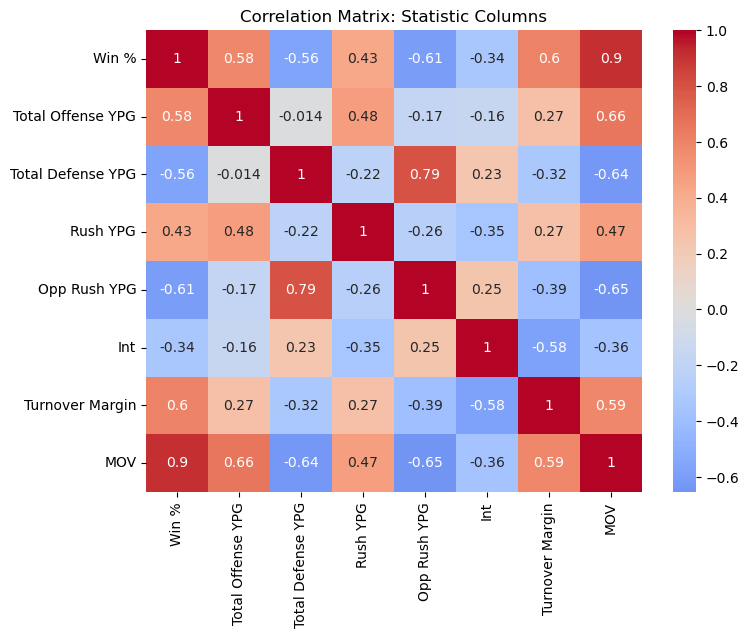

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Statistic Columns')
plt.show()

In [11]:
# Correlation Matrix | Team Ranking in categories
extra_cols = ['Win %', 'MOV', 'ATS +/-']
rank_cols = football_df.columns[football_df.columns.str.contains('Rank', case=False)]
selected_cols = extra_cols + list(rank_cols)
correlation_matrix_rank = football_df[selected_cols].corr()
correlation_matrix_rank

,Win %,MOV,ATS +/-,Offensive Rank,Rushing Rank,Passing Rank,Defensive Rank,Rushing Defensive Rank,Passing Defensive Rank,TM Rank,PPG Rank,Penalty YPG Rank,TOP Rank
Win %,1.000000,0.904149,0.558866,-0.580833,-0.441039,-0.302229,-0.540993,-0.598936,-0.223285,-0.594529,-0.081722,-0.045885,-0.275082
MOV,0.904149,1.000000,0.590266,-0.656809,-0.493632,-0.355502,-0.617665,-0.640636,-0.292246,-0.574495,-0.058058,-0.027904,-0.243293
ATS +/-,0.558866,0.590266,1.000000,-0.309492,-0.291327,-0.125685,-0.318215,-0.380879,-0.105045,-0.499441,-0.101458,-0.065934,-0.189330
Offensive Rank,-0.580833,-0.656809,-0.309492,1.000000,0.528254,0.683560,0.021886,0.183502,-0.154167,0.258569,-0.171805,-0.206348,0.071083
Rushing Rank,-0.441039,-0.493632,-0.291327,0.528254,1.000000,-0.190397,0.213593,0.254027,0.060346,0.279136,0.018678,-0.010863,0.270314
Passing Rank,-0.302229,-0.355502,-0.125685,0.683560,-0.190397,1.000000,-0.150130,0.001507,-0.225219,0.084093,-0.184782,-0.204887,-0.130029
Defensive Rank,-0.540993,-0.617665,-0.318215,0.021886,0.213593,-0.150130,1.000000,0.767732,0.722749,0.305346,0.084219,0.086977,0.425009
Rushing Defensive Rank,-0.598936,-0.640636,-0.380879,0.183502,0.254027,0.001507,0.767732,1.000000,0.163588,0.379920,0.047121,0.035448,0.384966
Passing Defensive Rank,-0.223285,-0.292246,-0.105045,-0.154167,0.060346,-0.225219,0.722749,0.163588,1.000000,0.072637,0.108450,0.120743,0.261842
TM Rank,-0.594529,-0.574495,-0.499441,0.258569,0.279136,0.084093,0.305346,0.379920,0.072637,1.000000,0.120516,0.082307,0.155664


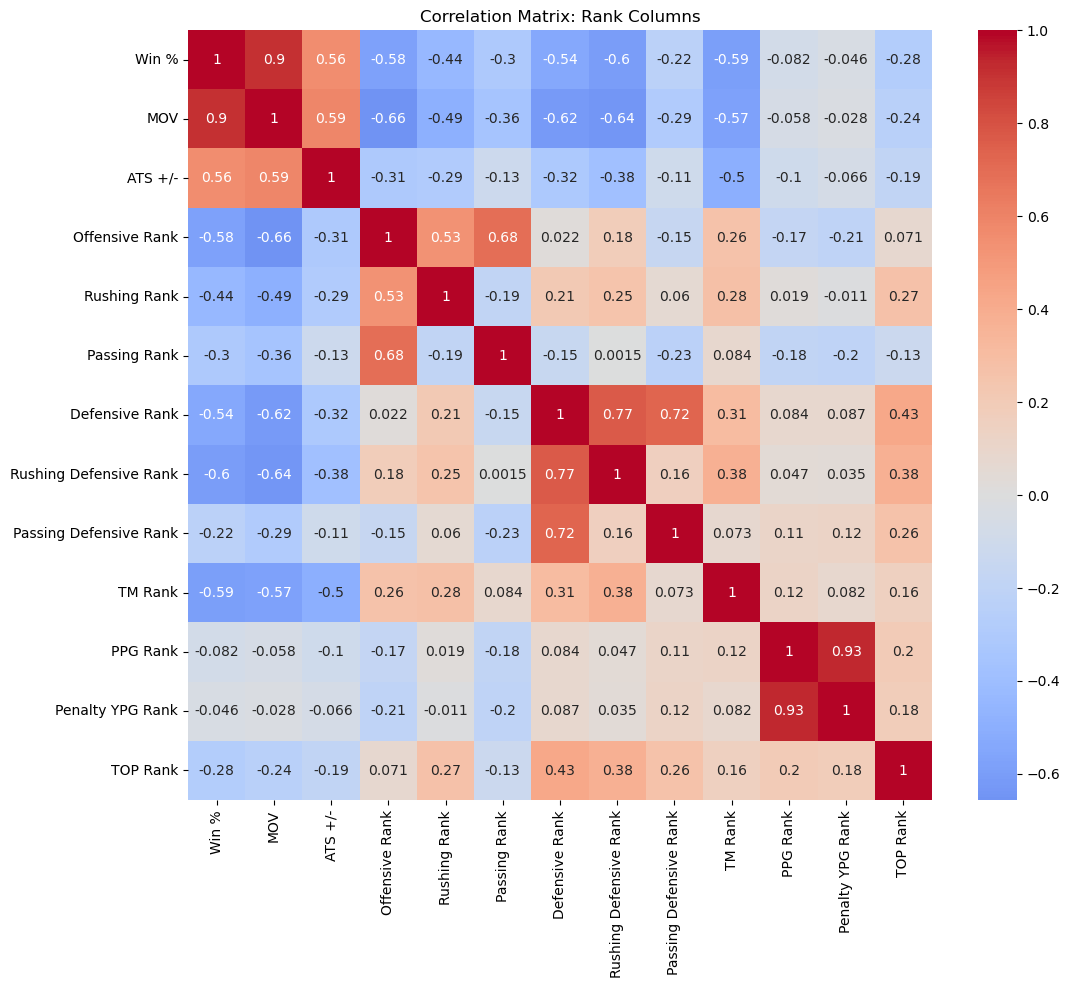

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_rank, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Rank Columns')
plt.show()

In [13]:
correlation_matrix_rank_filtered = football_df[['Win %', 'Offensive Rank', 'Defensive Rank', 'Rushing Rank', 'Passing Rank', 'Rushing Defensive Rank', 'TM Rank', 'MOV']].corr()
correlation_matrix_rank_filtered

,Win %,Offensive Rank,Defensive Rank,Rushing Rank,Passing Rank,Rushing Defensive Rank,TM Rank,MOV
Win %,1.000000,-0.580833,-0.540993,-0.441039,-0.302229,-0.598936,-0.594529,0.904149
Offensive Rank,-0.580833,1.000000,0.021886,0.528254,0.683560,0.183502,0.258569,-0.656809
Defensive Rank,-0.540993,0.021886,1.000000,0.213593,-0.150130,0.767732,0.305346,-0.617665
Rushing Rank,-0.441039,0.528254,0.213593,1.000000,-0.190397,0.254027,0.279136,-0.493632
Passing Rank,-0.302229,0.683560,-0.150130,-0.190397,1.000000,0.001507,0.084093,-0.355502
Rushing Defensive Rank,-0.598936,0.183502,0.767732,0.254027,0.001507,1.000000,0.379920,-0.640636
TM Rank,-0.594529,0.258569,0.305346,0.279136,0.084093,0.379920,1.000000,-0.574495
MOV,0.904149,-0.656809,-0.617665,-0.493632,-0.355502,-0.640636,-0.574495,1.000000


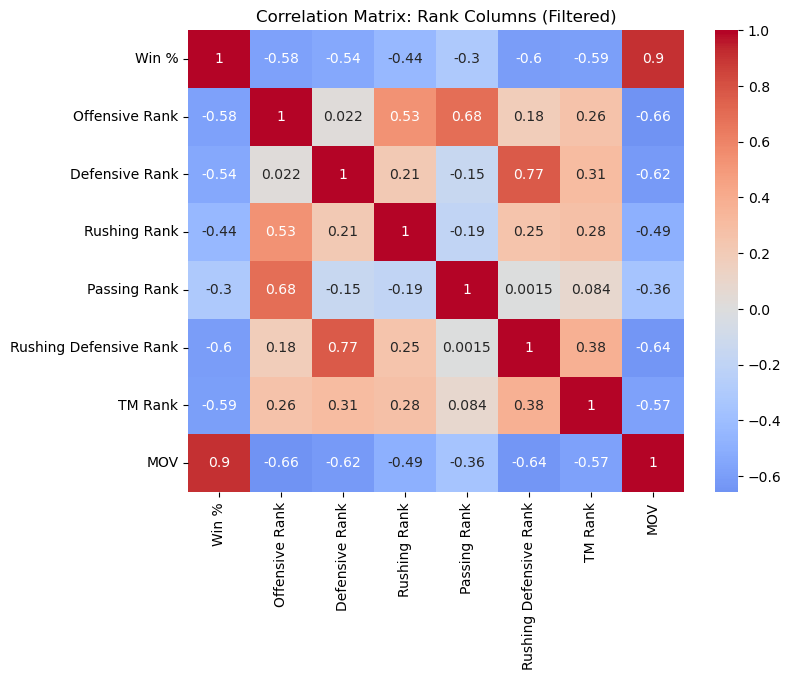

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_rank_filtered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Rank Columns (Filtered)')
plt.show()

---
# Hypothesis Test
- Pearson's Correlation Test
- T-Test among different variables
- Two Sample T-Test on MOV (balanced v. unbalanced)

In [15]:
# calculate Pearson correlation between 'Win %' and 'Total Offense YPG'
pearson_corr = football_df["Win %"].corr(football_df["Total Offense YPG"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")


Pearson Correlation: 0.5792
Interpretation: Moderate linear correlation.


In [16]:
# calculate Pearson correlation between 'Win %' and 'Total Defense YPG'
pearson_corr = football_df["Win %"].corr(football_df["Total Defense YPG"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: -0.5577
Interpretation: Moderate linear correlation.


In [17]:
# calculate Pearson correlation between 'Win %' and 'MOV'
pearson_corr = football_df["Win %"].corr(football_df["MOV"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.9041
Interpretation: Strong linear correlation.


In [18]:
# perform Welch's t-test (default for unequal variances) for 'Total Defense YPG' and 'Total Offense YPG'
t_stat, p_value = ttest_ind(football_df["Total Defense YPG"], football_df['Total Offense YPG'], equal_var=False)

# display the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# interpretation
alpha = 0.0
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

T-Statistic: -3.4385
P-Value: 0.0006
Fail to reject H0


In [19]:
# perform Welch's t-test (default for unequal variances) for 'Offensive Rank' and 'Win %'
t_stat, p_value = ttest_ind(football_df["Offensive Rank"], football_df['Win %'], equal_var=False)

# display the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

T-Statistic: 7.5275
P-Value: 0.0000
Reject H0


In [20]:
# perform Welch's t-test (default for unequal variances) for 'Defensive Rank' and 'Win %'
t_stat, p_value = ttest_ind(football_df["Defensive Rank"], football_df['Win %'], equal_var=False)

# display the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

T-Statistic: 7.1741
P-Value: 0.0000
Reject H0


In [21]:
# Assign balance status based on MOV being positive or negative
football_df['MOV_Balance_Status'] = football_df['MOV'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
football_df['MOV_Balance_Status']

0      Positive
1      Positive
2      Negative
3      Negative
4      Positive
         ...   
514    Negative
515    Negative
516    Negative
517    Negative
518    Negative
Name: MOV_Balance_Status, Length: 519, dtype: object

C:\Users\chait\AppData\Local\Temp\ipykernel_22360\385803453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MOV_Balance_Status', data=football_df, palette='coolwarm')


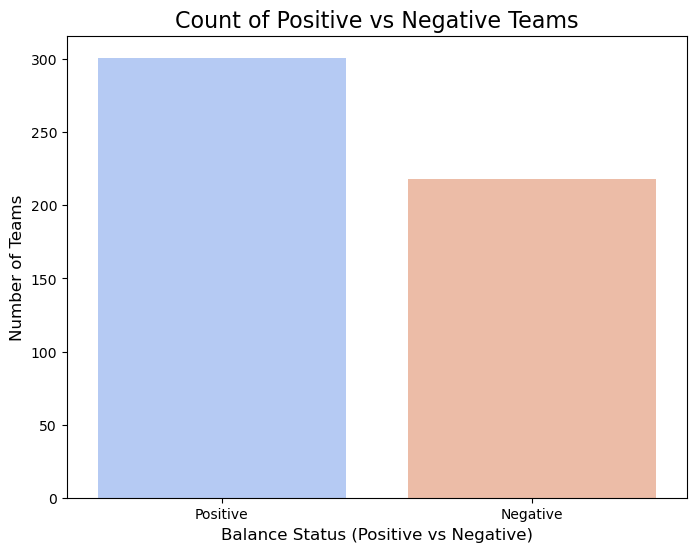

In [22]:
# Count of Balanced vs Unbalanced teams
balance_counts = football_df['MOV_Balance_Status'].value_counts()

# Plot the count of Balanced vs Unbalanced teams
plt.figure(figsize=(8, 6))
sns.countplot(x='MOV_Balance_Status', data=football_df, palette='coolwarm')

plt.xlabel("Balance Status (Positive vs Negative)", fontsize=12)
plt.ylabel("Number of Teams", fontsize=12)
plt.title("Count of Positive vs Negative Teams", fontsize=16)

plt.show()

In [23]:
# Perform two-sample t-test
from scipy.stats import ttest_ind
positive_MOV = football_df[football_df['MOV_Balance_Status'] == 'Positive']['MOV']
negative_MOV = football_df[football_df['MOV_Balance_Status'] == 'Negative']['MOV']

t_stat, p_value = stats.ttest_ind(positive_MOV, negative_MOV, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

T-statistic: 30.7301
P-value: 1.293869351160836e-114


---
# Visualizations
- Histogram with the Win % Distribution
- Scatter Plot with Trendline showing the relationship between:
    -  Win % and Total Offense YPG
    -  Win % and Total Defense YPG

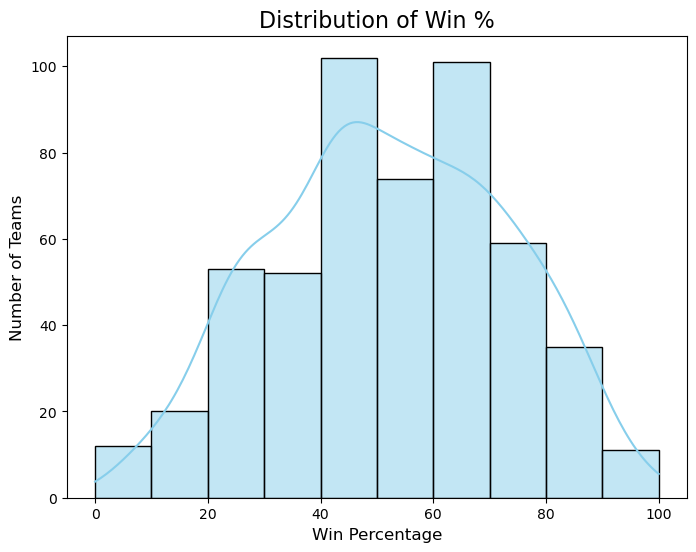

In [24]:
# Histogram of Win %
plt.figure(figsize=(8, 6))
sns.histplot(football_df['Win %'], bins=10, kde=True, color='skyblue')

plt.xlabel('Win Percentage', fontsize=12)
plt.ylabel('Number of Teams', fontsize=12)
plt.title('Distribution of Win %', fontsize=16)

plt.show()

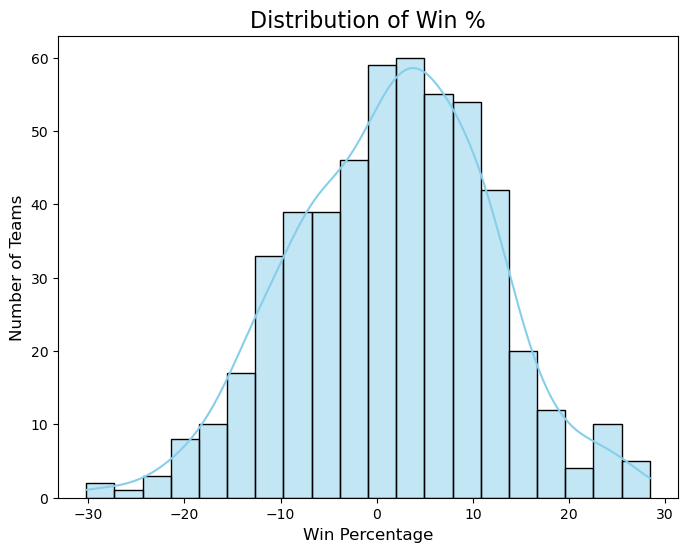

In [25]:
# Histogram of MOV
plt.figure(figsize=(8, 6))
sns.histplot(football_df['MOV'], bins=20, kde=True, color='skyblue')

plt.xlabel('Win Percentage', fontsize=12)
plt.ylabel('Number of Teams', fontsize=12)
plt.title('Distribution of Win %', fontsize=16)

plt.show()

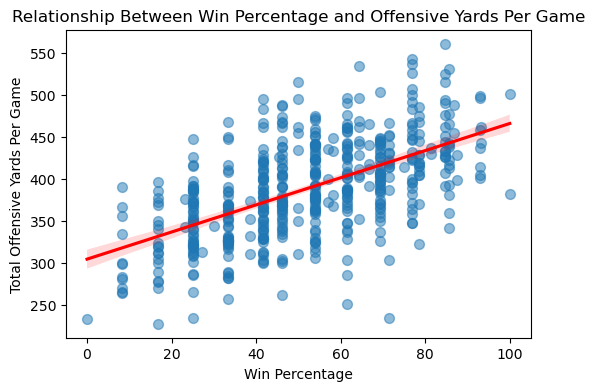

Trendline: Win % = 0.2076(Total Offensive YPG) + -28.71


In [26]:
# Offense YPG and Win % Scatter Plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Win %', y='Total Offense YPG', data=football_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel('Win Percentage')
plt.ylabel('Total Offensive Yards Per Game')
plt.title('Relationship Between Win Percentage and Offensive Yards Per Game')

plt.show()

# Trendline
coefficients = np.polyfit(football_df['Total Offense YPG'], football_df['Win %'], deg=1)
slope = coefficients[0]
intercept = coefficients[1]
print(f'Trendline: Win % = {round(slope,4)}(Total Offensive YPG) + {round(intercept,2)}')

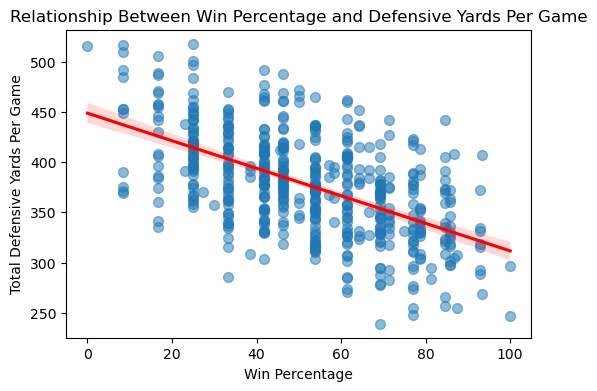

Trendline: Win % = -0.2269(Total Defense YPG) + 137.67


In [27]:
# Defense YPG and Win % Scatter Plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Win %', y='Total Defense YPG', data=football_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel('Win Percentage')
plt.ylabel('Total Defensive Yards Per Game')
plt.title('Relationship Between Win Percentage and Defensive Yards Per Game')

plt.show()

# Trendline
coefficients = np.polyfit(football_df['Total Defense YPG'], football_df['Win %'], deg=1)
slope = coefficients[0]
intercept = coefficients[1]
print(f'Trendline: Win % = {round(slope,4)}(Total Defense YPG) + {round(intercept,2)}')

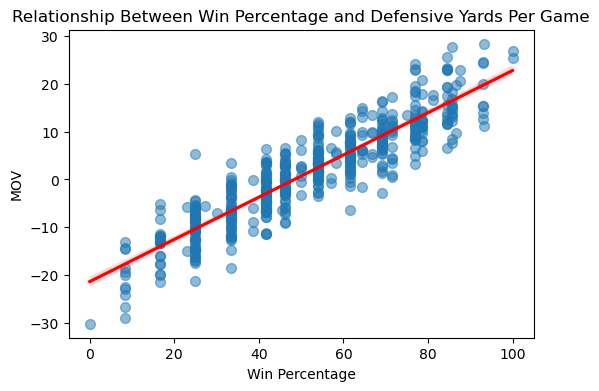

Trendline: Win % = 1.8508(MOV) + 49.07


In [28]:
# MOV and Win % Scatter Plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Win %', y='MOV', data=football_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel('Win Percentage')
plt.ylabel('MOV')
plt.title('Relationship Between Win Percentage and Defensive Yards Per Game')

plt.show()

# Trendline
coefficients = np.polyfit(football_df['MOV'], football_df['Win %'], deg=1)
slope = coefficients[0]
intercept = coefficients[1]
print(f'Trendline: Win % = {round(slope,4)}(MOV) + {round(intercept,2)}')

---
# Machine Learning
- Linear Regression
- Linear Regression with train_test_split at 30/70

In [29]:
# Linear Regression
X = football_df[['Total Offense YPG', 'Total Defense YPG']]
y = football_df['Win %']
fit = LinearRegression().fit(X, y)
print("Intercept for final model:", fit.intercept_)
print('The score for this final model is:', fit.score(X,y))

Intercept for final model: 56.748781810746564
The score for this final model is: 0.637736297375668


In [30]:
# Linear Regression with train_test_split
from sklearn.model_selection import train_test_split
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)

0.6441550311507496

In [31]:
# Calculate the mean for Total Offense YPG and Total Defense YPG
offense_mean = football_df['Total Offense YPG'].mean()
defense_mean = football_df['Total Defense YPG'].mean()

# Filter teams with below-average offense and defense
below_avg_teams = football_df[
    (football_df['Total Offense YPG'] <= offense_mean) & 
    (football_df['Total Defense YPG'] >= defense_mean)
]

# Display the teams
below_avg_teams[['Team', 'Total Offense YPG', 'Total Defense YPG']]


,Team,Total Offense YPG,Total Defense YPG
62,Georgia St,389.0,418.7
63,Colorado St,387.6,394.5
65,Maryland,386.1,378.1
66,Arkansas St,384.4,461.8
68,Marshall,382.8,378.1
...,...,...,...
511,U Mass,300.3,485.0
512,Indiana,290.0,384.6
513,Temple,287.4,398.3
516,Connecticut,265.0,453.3


In [32]:
# Calculate the mean number of wins for teams with above-average offense and defense
above_avg_wins_mean = football_df[
    (football_df['Total Offense YPG'] > offense_mean) & 
    (football_df['Total Defense YPG'] < defense_mean)
]['Wins'].mean()

# Filter teams with below-average offense and defense but more wins than the above-average mean
outliers = below_avg_teams[below_avg_teams['Wins'] > above_avg_wins_mean]

# Display the outliers
outliers[['Team', 'Wins', 'Total Offense YPG', 'Total Defense YPG']]

,Team,Wins,Total Offense YPG,Total Defense YPG
68,Marshall,10,382.8,378.1


In [33]:
# Group by Conference and calculate average Offensive Rank
conference_offense_stats = football_df.groupby('Conference')['Offensive Rank'].mean().sort_values()

# Count the number of teams in each conference with Offensive Rank in the top 50
top_offensive_teams = football_df[football_df['Offensive Rank'] <= 50].groupby('Conference').size()

# Display the results
print("Average Offensive Rank by Conference:")
print(conference_offense_stats)

print("\nNumber of Teams with Top 50 Offensive Rank by Conference:")
print(top_offensive_teams)

Average Offensive Rank by Conference:
Conference
Big 12             48.720000
SEC                52.258621
The American       54.200000
Pac-12             60.878788
ACC                62.288136
AAC                63.720000
CUSA               66.902439
Sun Belt           67.460000
Mountain West      75.770833
FBS Independent    76.260870
Big Ten            81.016949
MAC                83.437500
Name: Offensive Rank, dtype: float64

Number of Teams with Top 50 Offensive Rank by Conference:
Conference
AAC                10
ACC                26
Big 12             29
Big Ten            14
CUSA               13
FBS Independent     6
MAC                 9
Mountain West      13
Pac-12             15
SEC                31
Sun Belt           18
The American       12
dtype: int64


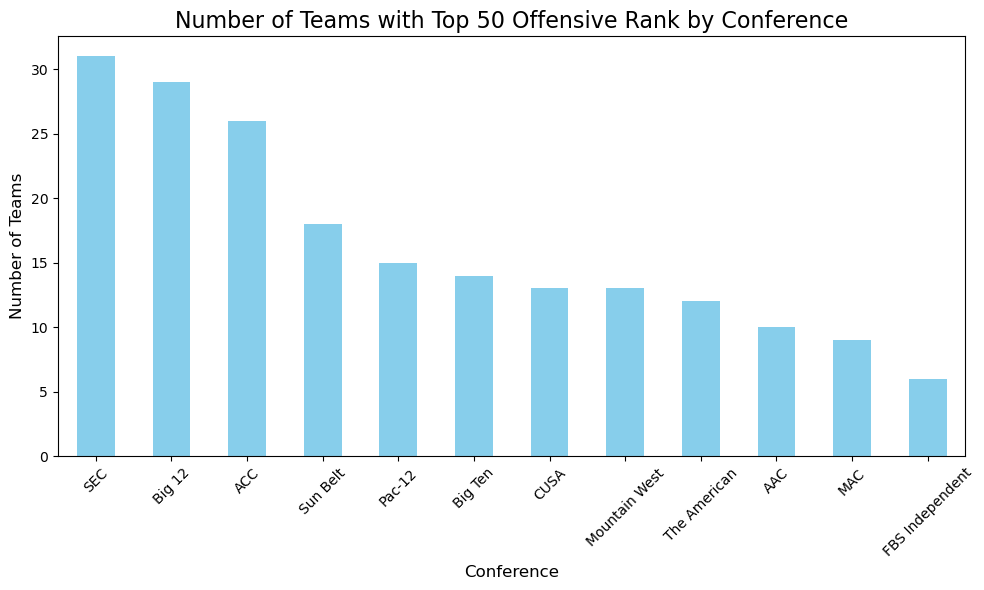

In [34]:
# Plot the number of teams with a top 50 offensive rank by conference
plt.figure(figsize=(10, 6))
top_offensive_teams.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.xlabel('Conference', fontsize=12)
plt.ylabel('Number of Teams', fontsize=12)
plt.title('Number of Teams with Top 50 Offensive Rank by Conference', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Coefficients: [ 7.24856445 -7.10160184 -7.14862502]
Intercept: -44.70093265665896


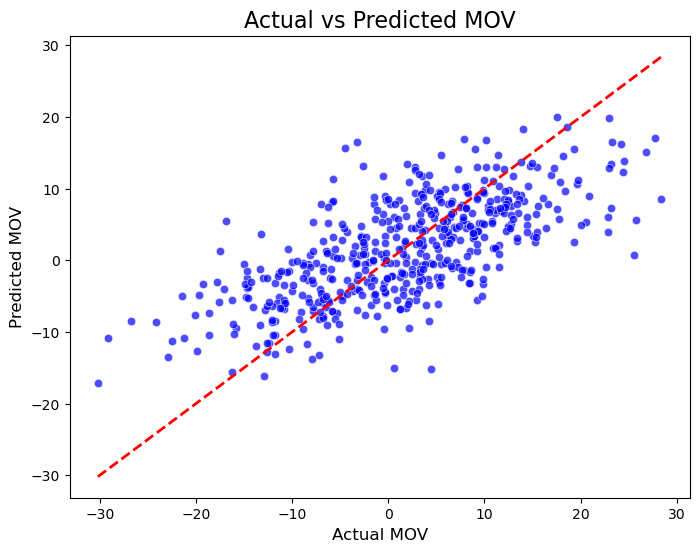

In [35]:
# Define the features (offensive statistics) and target (MOV)
X = football_df[['Total Offense YPG', 'Rush YPG', 'Pass YPG']]
y = football_df['MOV']

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Display the coefficients and intercept
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Predict MOV using the model
football_df['Predicted MOV'] = lin_reg.predict(X)

# Plot actual vs predicted MOV
plt.figure(figsize=(8, 6))
sns.scatterplot(x=football_df['MOV'], y=football_df['Predicted MOV'], alpha=0.7, color='blue')
plt.plot([football_df['MOV'].min(), football_df['MOV'].max()], 
         [football_df['MOV'].min(), football_df['MOV'].max()], 
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual MOV', fontsize=12)
plt.ylabel('Predicted MOV', fontsize=12)
plt.title('Actual vs Predicted MOV', fontsize=16)
plt.show()

---
# Time Series
- Holt Method for predicting Trends in Conference and their Avg MOV

In [36]:
from pandas.tseries.frequencies import infer_freq
from pandas.tseries.offsets import QuarterEnd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

In [37]:
# For the sake of Time Series calculations, convert 'Season' to a datetime with Jan 1 as default
football_df['Season_Date'] = pd.to_datetime(football_df['Season'].astype(str) + '-01-01')
print(football_df['Season_Date'])

0     2024-01-01
1     2024-01-01
2     2024-01-01
3     2024-01-01
4     2024-01-01
         ...    
514   2021-01-01
515   2021-01-01
516   2021-01-01
517   2021-01-01
518   2021-01-01
Name: Season_Date, Length: 519, dtype: datetime64[ns]


In [38]:
# Limit the data to show conferences that have MOV data for all scraped seasons (2021-2024)
conf_MOV = football_df.groupby(['Conference', 'Season_Date'])['MOV'].mean().reset_index()
conf_MOV = conf_MOV.groupby('Conference').filter(lambda x: x['Season_Date'].nunique() == 4)
conf_MOV

,Conference,Season_Date,MOV
2,ACC,2021-01-01,3.214286
3,ACC,2022-01-01,2.507143
4,ACC,2023-01-01,2.864286
5,ACC,2024-01-01,2.858824
6,Big 12,2021-01-01,3.510000
7,Big 12,2022-01-01,4.570000
8,Big 12,2023-01-01,3.485714
9,Big 12,2024-01-01,2.950000
10,Big Ten,2021-01-01,3.685714
11,Big Ten,2022-01-01,4.328571


c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


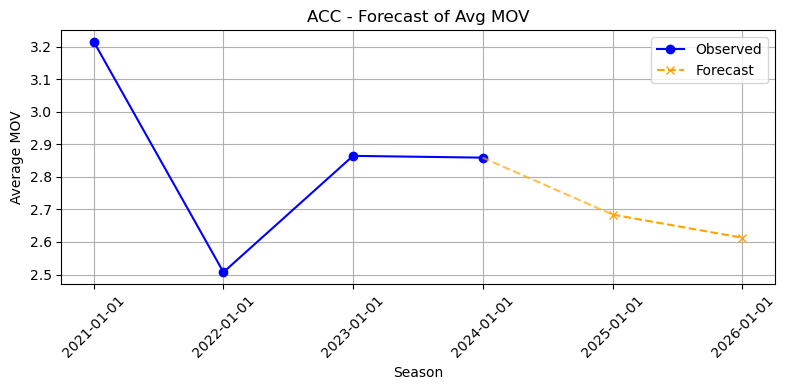

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


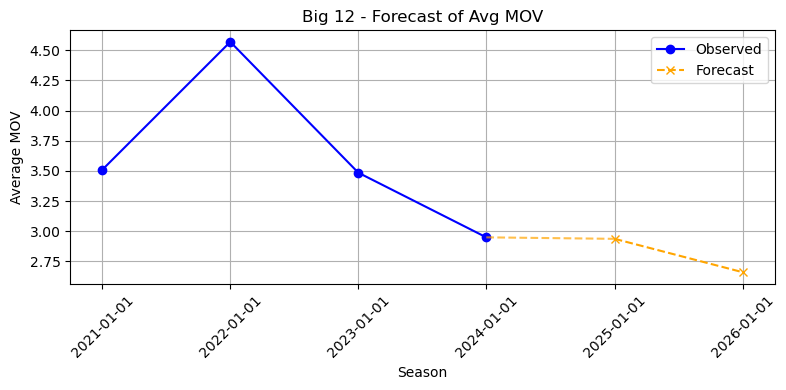

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


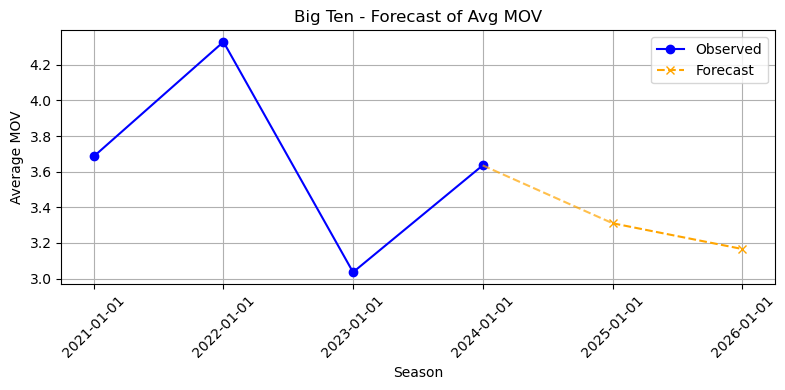

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


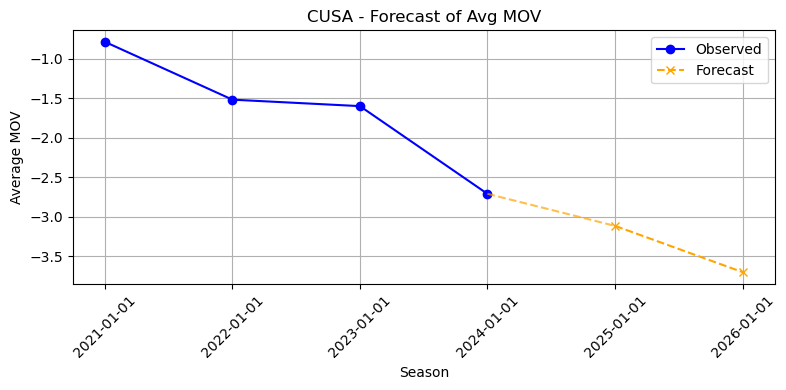

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


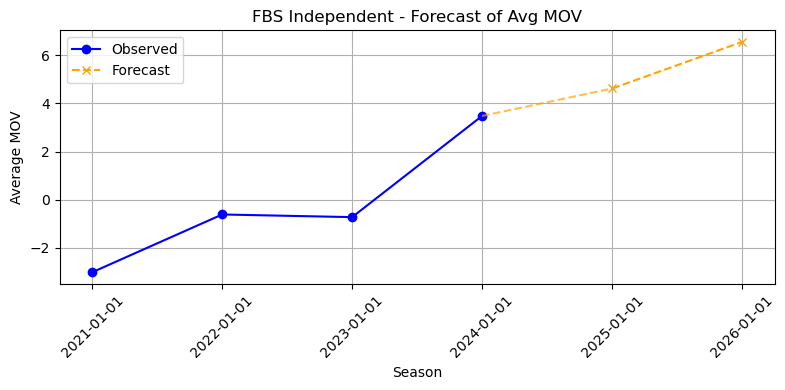

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


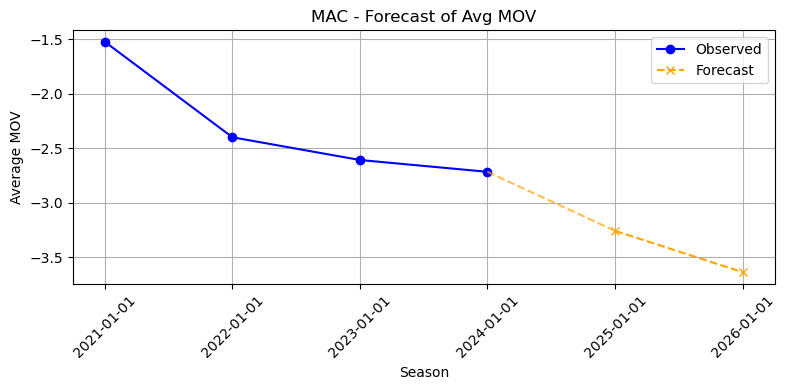

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


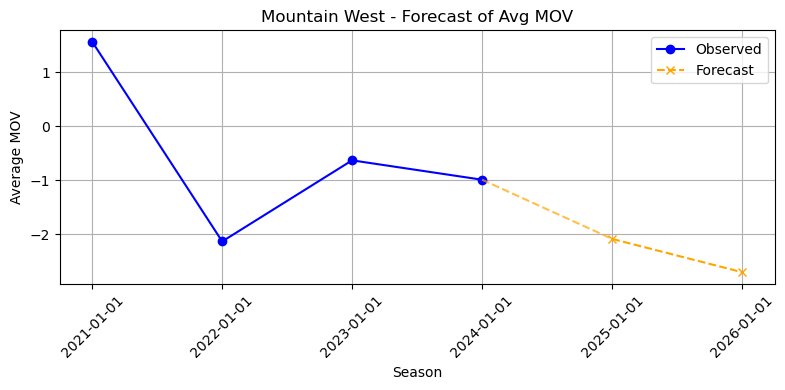

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


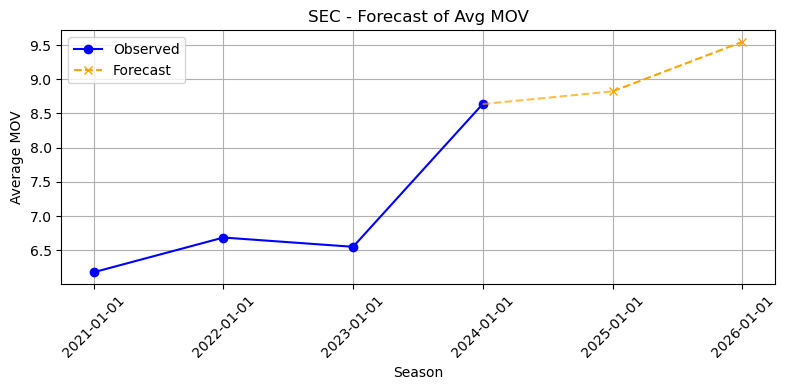

c:\Users\chait\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


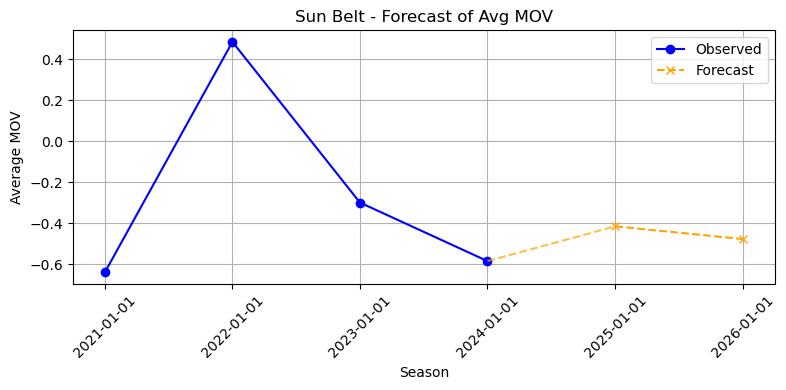

In [39]:
# Cycle Holt's forecasting model for the next 2 future seasons for each conference that has seasons recorded from 2021-2024
for conf in conf_MOV['Conference'].unique():
    subset = conf_MOV[conf_MOV['Conference'] == conf].sort_values('Season_Date')
    mov_series = subset.set_index('Season_Date')['MOV']

    # Holt's model for next 2 seasons
    model = Holt(mov_series, initialization_method='estimated')
    fit = model.fit()
    forecast = fit.forecast(2)

    # Plot observed data
    plt.figure(figsize=(8, 4))
    plt.plot(mov_series.index, mov_series.values, label='Observed', marker='o', color='blue')
    
    # Plot forecast data
    plt.plot(forecast.index, forecast.values, label='Forecast', marker='x', linestyle='--', color='orange')
    plt.plot([mov_series.index[-1], forecast.index[0]], [mov_series.values[-1], forecast.values[0]], linestyle='--', color='orange', alpha=0.7)

    plt.title(f'{conf} - Forecast of Avg MOV')
    plt.xlabel('Season')
    plt.ylabel('Average MOV')
    plt.xticks(list(mov_series.index) + list(forecast.index), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [60]:
# Do any teams have a high count of games with statistically average or below-average offense/defense?
# Filter teams with below-average offense or defense
below_avg_offense_defense = football_df[
    (football_df['Total Offense YPG'] <= offense_mean) | 
    (football_df['Total Defense YPG'] >= defense_mean)
]

# Count the number of games for each team
team_game_counts = below_avg_offense_defense['Team'].value_counts()

# Display teams with a high count of such games
high_count_teams = team_game_counts[team_game_counts > 3]  # Adjust threshold as needed
print(high_count_teams.count())
print(high_count_teams)


54
Team
North Texas      4
Buffalo          4
U Mass           4
Ball St          4
Florida Intl     4
Middle Tenn      4
Wisconsin        4
Rice             4
Virginia         4
Duke             4
Ga Southern      4
Boston Col       4
Hawaii           4
Wake Forest      4
Navy             4
W Kentucky       4
New Mexico       4
San Diego St     4
Bowling Grn      4
N Mex State      4
Kent St          4
S Mississippi    4
Northwestern     4
Ul Monroe        4
Temple           4
Vanderbilt       4
Stanford         4
Michigan St      4
Wyoming          4
Iowa             4
Central Mich     4
Oklahoma         4
Akron            4
La Tech          4
Nevada           4
Charlotte        4
E Carolina       4
Colorado         4
Utah St          4
Syracuse         4
Texas Tech       4
Wash State       4
Kansas           4
S Florida        4
W Virginia       4
Fla Atlantic     4
Georgia St       4
Arkansas St      4
Old Dominion     4
Army             4
N Illinois       4
California       4
E Mi

In [ ]:
# Define balanced teams as those with Total Offense YPG above the offense mean and Total Defense YPG below the defense mean
balanced_teams = football_df[
    (football_df['Total Offense YPG'] > offense_mean) & 
    (football_df['Total Defense YPG'] < defense_mean)
]

# Define one-sided teams as those not meeting the balanced criteria
one_sided_teams = football_df[
    ~((football_df['Total Offense YPG'] > offense_mean) & 
      (football_df['Total Defense YPG'] < defense_mean))
]

# Calculate the average MOV for balanced and one-sided teams
avg_mov_balanced = balanced_teams['MOV'].mean()
avg_mov_one_sided = one_sided_teams['MOV'].mean()

# Display the results
print(f"Average MOV for balanced teams: {avg_mov_balanced:.2f}")
print(f"Average MOV for one-sided teams: {avg_mov_one_sided:.2f}")

Average MOV for balanced teams: 11.94
Average MOV for one-sided teams: -1.95
